<a href="https://colab.research.google.com/github/swimbeginner/TensorFlow2/blob/main/Copy_of_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [102]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [5]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2021-02-26 02:26:53--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  18.9MB/s    in 9.9s    

2021-02-26 02:27:03 (17.6 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [6]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2021-02-26 02:28:09--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  43.7MB/s    in 1.4s    

2021-02-26 02:28:10 (43.7 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [103]:
# Load the dataset from your Drive folder
train = loadmat('/content/sample_data/train_32x32.mat')
test = loadmat('/content/sample_data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [104]:
k,v=train.popitem()
train_y=v

In [105]:
#change the label 10 to 0
train_y=train_y%10

histgram of labels:
 (array([ 4948, 13861, 10585,  8497,  7458,  6882,  5727,  5595,  5045,
        4659,     0,     0,     0,     0,     0,     0,     0,     0,
           0]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]))


Text(0.5, 1.0, 'histgram of labels from 1 to 10')

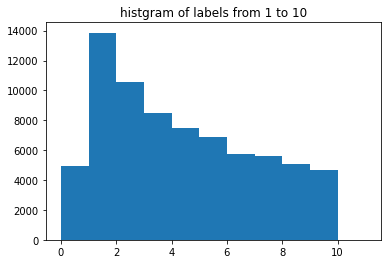

In [106]:
import matplotlib.pyplot as plt
a=np.histogram(train_y[:,0], bins=np.arange(20))
print('histgram of labels:\n',a)
fig=plt.hist(train_y[:,0], bins=np.arange(12))
plt.title('histgram of labels from 1 to 10')

In [107]:
k,v=train.popitem()
train_x=v
train_x.shape
train_x=np.moveaxis(train_x, -1, 0)

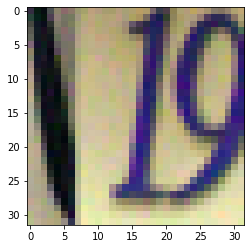

In [108]:
#import image lib, test plt an image 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.text as txt
import numpy as np
from PIL import Image
img=tf.keras.preprocessing.image.array_to_img(
    train_x[0,:,:,:], data_format=None, scale=True, dtype=None
)
#print(train_y[0:10])
plt.imshow(img)

10 random pictures with labels:


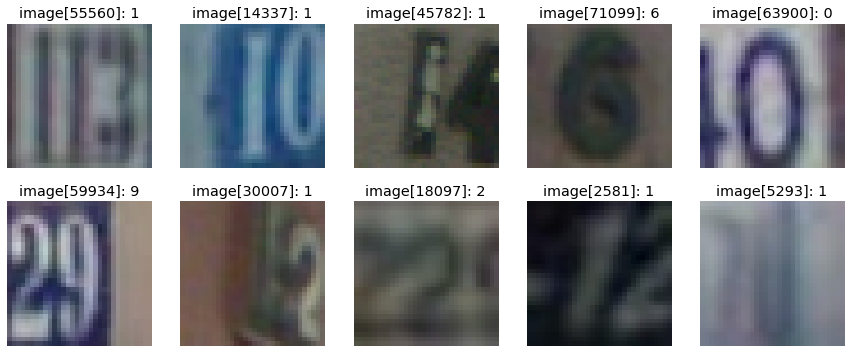

In [109]:
# plot random 10 images with labels
import random
def plotImagesAndLabels(train_x, train_y):    
    fig, m_axs = plt.subplots(2, 5, figsize = (15, 6))
#    for i, ax in enumerate(m_axs):
    print('10 random pictures with labels:' )
    for i, ax in enumerate(m_axs.ravel()): #2 dimension, needs ravel.
        
        imgIndex=random.randrange(train_y.shape[0])
        ax.imshow(train_x[imgIndex,...],  interpolation='none', cmap='gray')#, vmin = -1.5, vmax = 1.5)
        ax.set_title(f'image[{imgIndex}]: {train_y[imgIndex][0]}', fontsize="x-large")
        ax.axis('off')
    fig.show()
plotImagesAndLabels(train_x, train_y)

10 random pictures with labels:


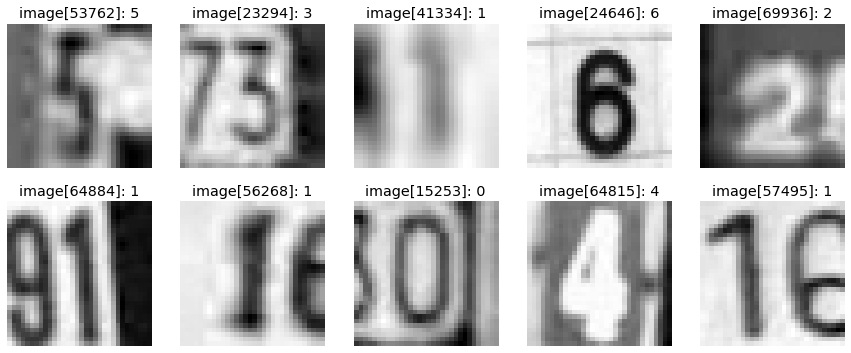

In [110]:
#convert train_x rgb color image into grey scale image
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#train_x.shape
train_x2=rgb2gray(train_x)
plotImagesAndLabels(train_x2, train_y)

In [111]:
#double check train_x2
train_x2.shape
train_x2=train_x2[...,np.newaxis]
train_x2.shape

(73257, 32, 32, 1)

In [112]:
#split the data into train and validation (or test set)
from sklearn.model_selection import train_test_split
#train_test_split?
# Split the data
train_x2=train_x2/255.
train_y=train_y
x_train, x_valid, y_train, y_valid = train_test_split(train_x2, train_y, test_size=0.2, shuffle= True)

In [113]:
print( x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(58605, 32, 32, 1) (14652, 32, 32, 1) (58605, 1) (14652, 1)


In [114]:
#plotImagesAndLabels(np.squeeze(x_train), y_train)

In [115]:
#plotImagesAndLabels(np.squeeze(x_valid), y_valid)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [116]:
import tensorflow as tf 
from tensorflow.keras import layers, Sequential, Model

In [117]:
def get_model(input_shape):
    model=Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [118]:
input_shape=(32,32,1)
model=get_model(input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32, 32, 32)        64        
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 4,212,298
Trainable params: 4,212,298
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [120]:
class EarlyStoppingAtMinLoss(tf.keras.callbacks.Callback):
    def __init__(self, patience=2):
        super(EarlyStoppingAtMinLoss, self).__init__()
        self.patience = patience
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None
    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf
    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")       
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)
        if current<1.0:
            print('the training loss: {current}  is less than 1.0, stop training')
            self.stopped_epoch = epoch
            self.model.stop_training = True
            print("Restoring model weights from the end of the best epoch.")
            self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))

In [121]:

checkpoint_filepath = '/tmp/checkpoint'
modelCheckpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                                                   save_weights_only=True, 
                                                   monitor='val_accuracy', 
                                                   mode='max',
                                                   save_freq='epoch',
                                                   save_best_only=True)

In [122]:
from numpy.random import seed
seed(111)
history=model.fit(x_train, y_train, epochs=40, batch_size=64, validation_data=(x_valid, y_valid), callbacks=[EarlyStoppingAtMinLoss(), modelCheckpoint])

Epoch 1/40
916/916 [==============================] - 5s 5ms/step - loss: 2.1380 - accuracy: 0.2339 - val_loss: 1.3540 - val_accuracy: 0.5632
Epoch 2/40
916/916 [==============================] - 4s 4ms/step - loss: 1.2944 - accuracy: 0.5862 - val_loss: 1.1584 - val_accuracy: 0.6396
Epoch 3/40
916/916 [==============================] - 4s 4ms/step - loss: 1.1561 - accuracy: 0.6373 - val_loss: 1.1202 - val_accuracy: 0.6471
Epoch 4/40
916/916 [==============================] - 4s 4ms/step - loss: 1.1022 - accuracy: 0.6567 - val_loss: 1.0741 - val_accuracy: 0.6650
Epoch 5/40
916/916 [==============================] - 4s 4ms/step - loss: 1.0558 - accuracy: 0.6743 - val_loss: 1.0585 - val_accuracy: 0.6658
Epoch 6/40
916/916 [==============================] - 4s 4ms/step - loss: 1.0257 - accuracy: 0.6853 - val_loss: 1.0253 - val_accuracy: 0.6821
Epoch 7/40
916/916 [==============================] - 4s 4ms/step - loss: 1.0070 - accuracy: 0.6917 - val_loss: 1.0126 - val_accuracy: 0.6927
the tr

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


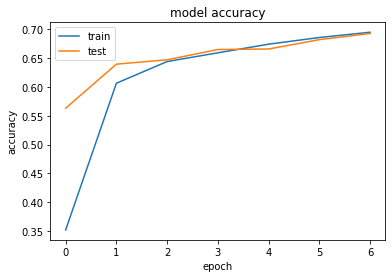

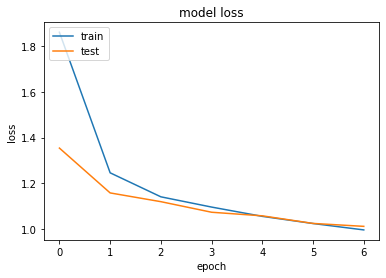

In [123]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [124]:
def get_CNN_model(input_shape):
    model=Sequential([
        tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [125]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='auto',min_delta=0.01,  patience=3)

checkpoint_filepath = '/tmp/checkpoint_cnn'
modelCheckpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                                                   save_weights_only=True, 
                                                   monitor='val_accuracy', 
                                                   mode='max',
                                                   save_freq='epoch',
                                                   save_best_only=True)

In [126]:
input_shape=(32,32,1)
model_cnn=get_CNN_model(input_shape)
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 15, 16)        64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 6, 6, 16)         

In [127]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_filepath = '/tmp/checkpoint_cnn'
history_cnn=model_cnn.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_valid, y_valid), callbacks=[earlyStopping, modelCheckpoint])

Epoch 1/30
916/916 [==============================] - 4s 4ms/step - loss: 1.9352 - accuracy: 0.3796 - val_loss: 0.6172 - val_accuracy: 0.8191
Epoch 2/30
916/916 [==============================] - 4s 4ms/step - loss: 0.7337 - accuracy: 0.7698 - val_loss: 0.5248 - val_accuracy: 0.8443
Epoch 3/30
916/916 [==============================] - 3s 4ms/step - loss: 0.6181 - accuracy: 0.8077 - val_loss: 0.4276 - val_accuracy: 0.8752
Epoch 4/30
916/916 [==============================] - 4s 4ms/step - loss: 0.5858 - accuracy: 0.8185 - val_loss: 0.4677 - val_accuracy: 0.8677
Epoch 5/30
916/916 [==============================] - 3s 4ms/step - loss: 0.5570 - accuracy: 0.8265 - val_loss: 0.3930 - val_accuracy: 0.8820
Epoch 6/30
916/916 [==============================] - 3s 4ms/step - loss: 0.5277 - accuracy: 0.8350 - val_loss: 0.4086 - val_accuracy: 0.8814


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


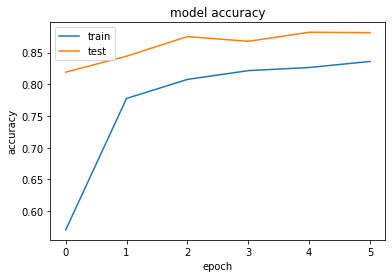

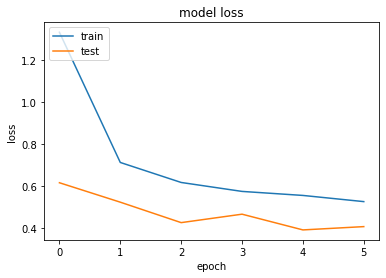

In [128]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(history_cnn.history.keys())
# summarize history for accuracy
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [130]:
kt,vt=test.popitem()
test_y=vt
test_y=test_y%10
kt,vt=test.popitem()
test_x=vt
test_x=np.moveaxis(test_x, -1, 0)

In [131]:
test_x2=rgb2gray(test_x)
test_x2=test_x2[...,np.newaxis]
test_x2=test_x2/255.

In [132]:
tf.keras.backend.clear_session()
model_pred=get_CNN_model(input_shape)
model_pred.load_weights('/tmp/checkpoint_cnn')

5 random pictures with labels, and calculated output distribution


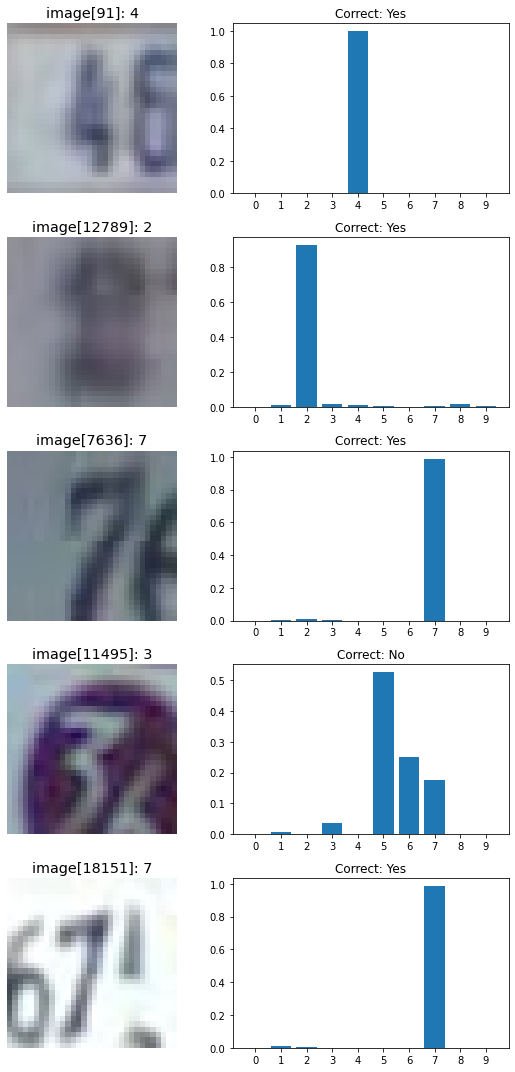

In [168]:
def plotpredict(test_x, test_x2, test_y):   
    x=np.arange(10).astype(int) 
    labels=x.astype('str')
    fig, m_axs = plt.subplots(5, 2, figsize = (8, 15))
#    for i, ax in enumerate(m_axs):
    print('5 random pictures with labels, and calculated output distribution' )
    for i, ax in enumerate(m_axs.ravel()): #2 dimension, needs ravel.
        if i%2==0:
          imgIndex=random.randrange(test_y.shape[0])
          ax.imshow(np.squeeze(test_x[imgIndex,...]),  interpolation='none', cmap='gray')#, vmin = -1.5, vmax = 1.5)
          ax.set_title(f'image[{imgIndex}]: {test_y[imgIndex][0]}', fontsize="x-large")
          ax.axis('off')
        else:
          pred=model_pred.predict(test_x2[imgIndex:imgIndex+1,...])
          ax.bar(x,pred[0,:])
          ax.set_xticks(x)
          ax.set_xticklabels(labels)
          corr='Yes' if pred.argmax()==test_y[imgIndex][0] else 'No'
          ax.set_title('Correct: '+ corr, loc='center')
          ax.title
    plt.tight_layout()
    plt.show()
plotpredict(test_x, test_x2, test_y)